# Pymaceuticals Inc.
---

### Analysis
As indicated by the correlation and regression data, there is a strong positive correlation between tumor size and body mass in the test mice. Larger mice have larger tumor sizes. Further, mice treated with Capomulin tended to have their tumor size decrease over time. Finally, mice treated with Infubinol had the least decrease in their tumor size over time. 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mice_count = len(combined_df['Mouse ID'].unique())
mice_count

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicates

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates_data = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicates_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_comb = combined_df.drop_duplicates(subset = ['Mouse ID', 'Timepoint'])
clean_comb

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_count = len(clean_comb['Mouse ID'].unique())
clean_count

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

mean = clean_comb['Tumor Volume (mm3)'].groupby(clean_comb['Drug Regimen']).mean()
median = clean_comb['Tumor Volume (mm3)'].groupby(clean_comb['Drug Regimen']).median()
var = clean_comb['Tumor Volume (mm3)'].groupby(clean_comb['Drug Regimen']).var()
std = clean_comb['Tumor Volume (mm3)'].groupby(clean_comb['Drug Regimen']).std()
sem = clean_comb['Tumor Volume (mm3)'].groupby(clean_comb['Drug Regimen']).sem()
summary = pd.DataFrame({'Mean Tumor Volume':mean, 'Median Tumor Volume':median, 'Tumor Volume Variance':var, 'Tumor Volume Std. Dev.':std, 'Tumor Volume Std. Err.':sem})
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

aggregated = combined_df.groupby('Drug Regimen')
aggregated_df = pd.DataFrame({'Mean':mean, 'Median':median, 'Variance':var, 'Std.':std, 'Std. Error':sem})
aggregated_df

,Mean,Median,Variance,Std.,Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: title={'center': 'Observed Mice per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Observed Mouse Timepoints'>

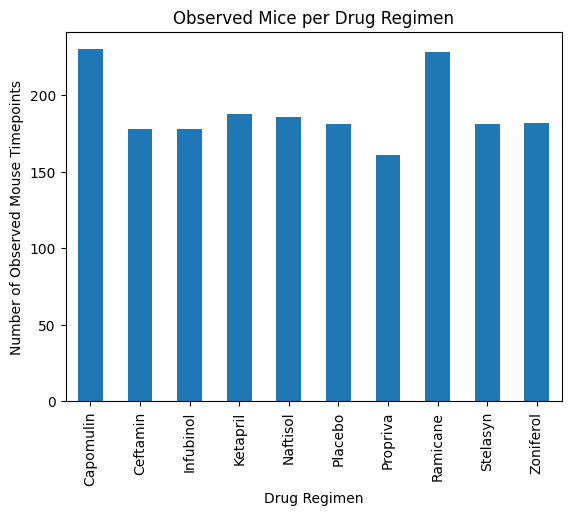

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_data = (combined_df.groupby(['Drug Regimen'])['Mouse ID'].count())
mice_chart = mice_data.plot(kind='bar', title='Observed Mice per Drug Regimen', xlabel='Drug Regimen', ylabel='Number of Observed Mouse Timepoints')
mice_chart


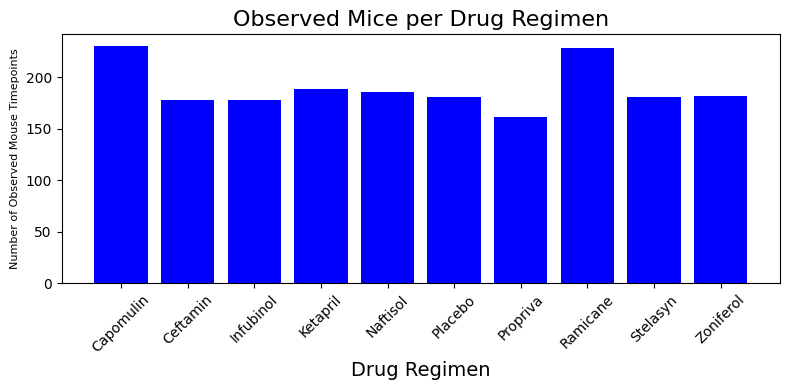

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
data = {
'drugs':['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], 
'mice':[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
}
micedrugs_df = pd.DataFrame(data)
plt.figure(figsize=(8,4))
plt.bar(micedrugs_df['drugs'], micedrugs_df['mice'], color='blue')
plt.title('Observed Mice per Drug Regimen', fontsize = 16)
plt.xlabel('Drug Regimen', fontsize=14)
plt.ylabel('Number of Observed Mouse Timepoints', fontsize=8)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


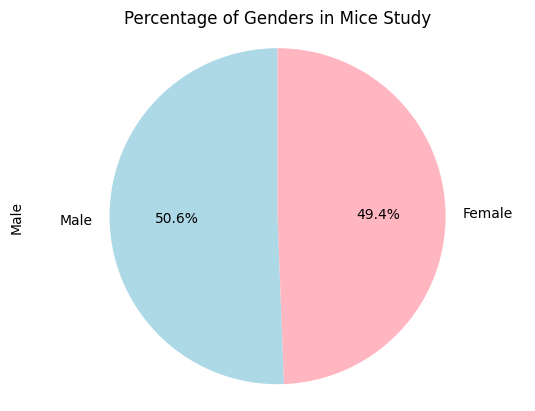

In [13]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
gender_data = combined_df['Sex'].value_counts()
gender_data.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightpink'])
plt.title('Percentage of Genders in Mice Study')
plt.ylabel('Male')
plt.axis('equal')
plt.show()

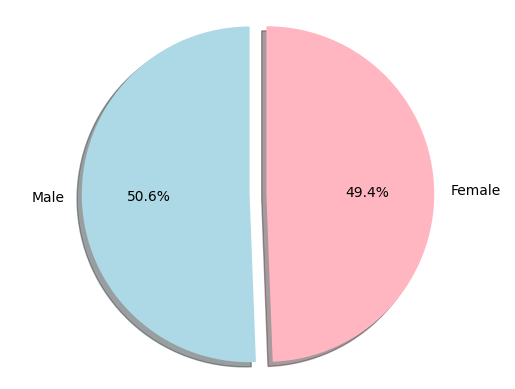

In [14]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
labels = ['Male', 'Female']
counts = [50.6, 49.4]
colors=['lightblue','lightpink']
explode=(0.1, 0)
plt.pie(counts,explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

max_point=clean_comb.groupby(['Mouse ID'])['Timepoint'].max()
max_point
tvalue = pd.merge(max_point, clean_comb, on=(['Mouse ID', 'Timepoint']))
tvalue.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = clean_comb.loc[clean_comb['Drug Regimen'] == 'Capomulin',:]
Ramicane_df = clean_comb.loc[clean_comb['Drug Regimen'] == 'Ramicane', :]
Infubinol_df = clean_comb.loc[clean_comb['Drug Regimen'] == 'Infubinol', :]
Ceftamin_df = clean_comb.loc[clean_comb['Drug Regimen'] == 'Ceftamin', :]
#Capomulin_df

In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for treatment in treatments:
    t_regimen = tvalue.loc[tvalue["Drug Regimen"] == treatment]
    tumor_vol= t_regimen["Tumor Volume (mm3)"]
    
    tumor_vol_data.append(tumor_vol)

# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset

quartile0 = tumor_vol_data[0].quantile([.25,.5,.75])
lowerq0 = quartile0[0.25]
upperq0 = quartile0[0.75]
IQR0 = upperq0-lowerq0

quartile1 = tumor_vol_data[1].quantile([.25,.5,.75])
lowerq1 = quartile1[0.25]
upperq1 = quartile1[0.75]
IQR1 = upperq1-lowerq1

quartile2 = tumor_vol_data[2].quantile([.25,.5,.75])
lowerq2 = quartile2[0.25]
upperq2 = quartile2[0.75]
IQR2 = upperq2-lowerq2

quartile3 = tumor_vol_data[3].quantile([.25,.5,.75])
lowerq3 = quartile3[0.25]
upperq3 = quartile3[0.75]
IQR3 = upperq3-lowerq3


    # Determine outliers using upper and lower bounds
lower_bound0 = lowerq0 - (1.5*IQR0)
upper_bound0 = upperq0 + (1.5*IQR0)

lower_bound1 = lowerq1 - (1.5*IQR1)
upper_bound1 = upperq1 + (1.5*IQR1)

lower_bound2 = lowerq2 - (1.5*IQR2)
upper_bound2 = upperq2 + (1.5*IQR2)

lower_bound3 = lowerq3 - (1.5*IQR3)
upper_bound3 = upperq3 + (1.5*IQR3)

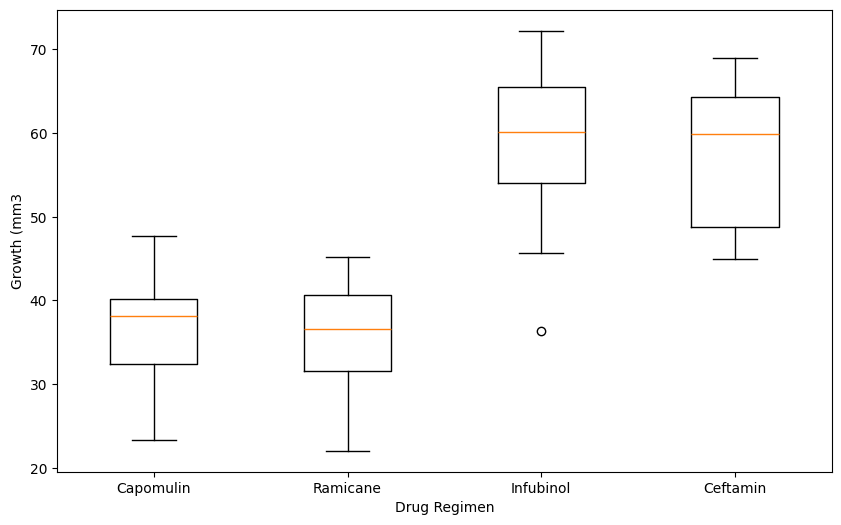

In [19]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10,6))
plt.boxplot(tumor_vol_data, tick_labels=treatments)
plt.ylabel('Growth (mm3')
plt.xlabel('Drug Regimen')
plt.show()


## Line and Scatter Plots

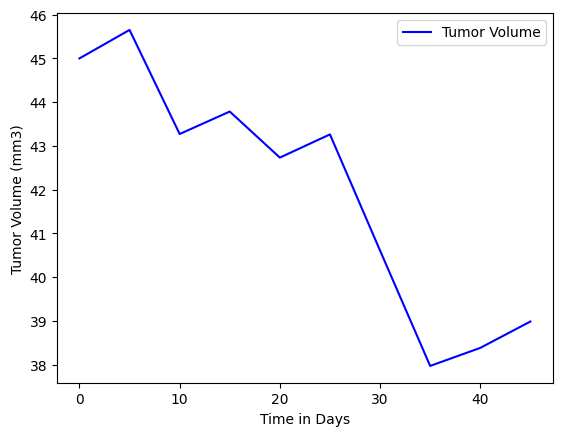

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_mouse = clean_comb.loc[clean_comb['Drug Regimen'] == 'Capomulin']
#cap_mouse.value_counts('Mouse ID') #got a list of mice trx with Capomulin
b128 = clean_comb.loc[clean_comb['Mouse ID'] == 'b128']
x_axis_b128 = b128['Timepoint']
y_axis_b128 = b128['Tumor Volume (mm3)']
plt.plot(x_axis_b128, y_axis_b128, color='blue', label='Tumor Volume')
plt.legend(loc='best')
plt.xlabel('Time in Days')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

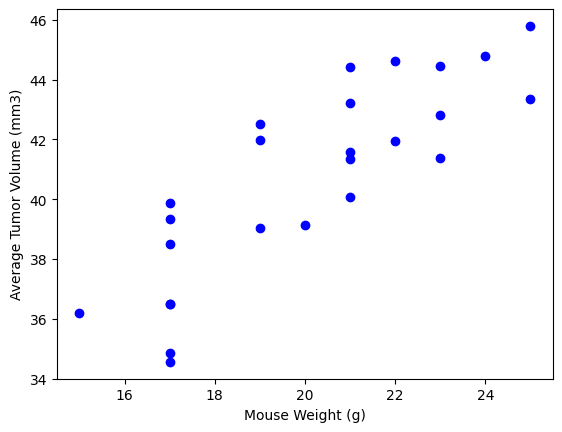

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_weight = clean_comb.loc[clean_comb['Drug Regimen'] == 'Capomulin',:].groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(cap_weight['Weight (g)'], cap_weight['Tumor Volume (mm3)'], color='blue')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr=round(st.pearsonr(cap_weight['Weight (g)'],cap_weight['Tumor Volume (mm3)'])[0],2)
x_values = cap_weight['Weight (g)']
y_values = cap_weight['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f'The slope is:{slope}')
print(f'The intercept is:{intercept}')
print(f'The rvalue is:{rvalue}')
print(f'The correlation coefficient is:{corr}')
print(f'The stndard dev is:{stderr}')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

The slope is:0.9544396890241049
The intercept is:21.552160532685008
The rvalue is:0.8419363424694721
The correlation coefficient is:0.84
The stndard dev is:0.12754359033201323
y = 0.95x + 21.55


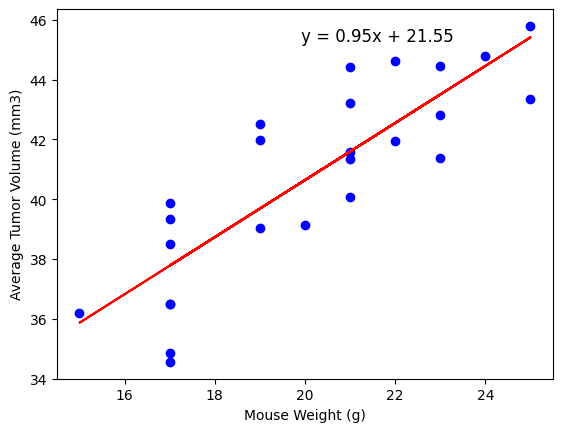

In [24]:
plt.scatter(cap_weight['Weight (g)'],cap_weight['Tumor Volume (mm3)'],color='blue')
plt.plot(x_values,regress_values,'r-')
plt.xlabel('Mouse Weight (g)', fontsize =10)
plt.ylabel('Average Tumor Volume (mm3)', fontsize =10)
plt.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=12)

plt.show()